## Exercício 1

In [1]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt

In [2]:
N = 400

In [3]:
class_0 = Data(mu=(2,  3), std=(.8,  2.5), n=N)
class_1 = Data(mu=(5,  6), std=(1.2, 1.9), n=N)
class_2 = Data(mu=(8,  1), std=(.9,   .9), n=N)
class_3 = Data(mu=(15, 4), std=(.5,  2.0), n=N)

In [4]:
x0, y0 = class_0.sample_initialize()
x1, y1 = class_1.sample_initialize()
x2, y2 = class_2.sample_initialize()
x3, y3 = class_3.sample_initialize()

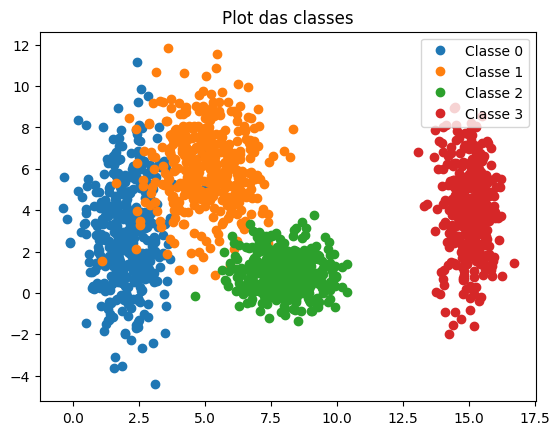

In [5]:
plt.plot(x0, y0, "o", label="Classe 0")
plt.plot(x1, y1, "o", label="Classe 1")
plt.plot(x2, y2, "o", label="Classe 2")
plt.plot(x3, y3, "o", label="Classe 3")

plt.legend()

plt.title("Plot das classes")

plt.show()

## Exercício 2

In [6]:
mu_A = np.array([0, 0, 0, 0, 0])
cov_A = np.array([[1.0, 0.8, 0.1, 0.0, 0.0],
                  [0.8, 1.0, 0.3, 0.0, 0.0],
                  [0.1, 0.3, 1.0, 0.5, 0.0],
                  [0.0, 0.0, 0.5, 1.0, 0.2],
                  [0.0, 0.0, 0.0, 0.2, 1.0]])

mu_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])
cov_B = np.array([[ 1.5, -0.7, 0.2, 0.0, 0.0],
                  [-0.7,  1.5, 0.4, 0.0, 0.0],
                  [ 0.2,  0.4, 1.5, 0.6, 0.0],
                  [ 0.0,  0.0, 0.6, 1.5, 0.3],
                  [ 0.0,  0.0, 0.0, 0.3, 1.5]])

class_A = MultiDimensionData(mu=mu_A, cov=cov_A, n=500)
class_B = MultiDimensionData(mu=mu_B, cov=cov_B, n=500)

In [ ]:
# Geração dos dados
sample_A = class_A.sample_initialize()
sample_B = class_B.sample_initialize()

dataset = np.concatenate((sample_A, sample_B))

In [ ]:
# Matriz de covariância
mat = np.cov(dataset, rowvar=False)

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(mat)

In [ ]:
idx = np.argsort(eigenvalues)[::-1] # Obtém os índices que ordenariam o vetor e inverte a lista
eigenvalues = eigenvalues[idx] # Ordena a lista de autovalores
eigenvectors = eigenvectors[:, idx] # Ordena a lista de autovetores (colunas)

In [ ]:
# Obtém os dois principais autovetores (para PC1 e PC2)
pcs = eigenvectors[:, :2] # matrix 5x2

In [ ]:
# Centralizar o dataset original 
dataset_mu = dataset.mean(axis=0) # matriz 1000x5
dataset_cent = dataset - dataset_mu

In [ ]:
Z = dataset_cent @ pcs # (1000,5) x (5, 2)

In [78]:
labels_A = np.zeros(500, dtype=int)
labels_B = np.ones(500, dtype=int)

y = np.concatenate((labels_A, labels_B))

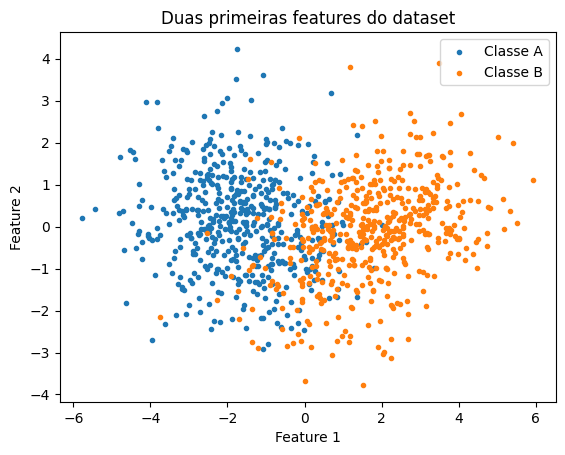

In [86]:
plt.scatter(Z[y==0, 0], Z[y==0, 1], label='Classe A', marker=".") # Plot da classe A
plt.scatter(Z[y==1, 0], Z[y==1, 1], label='Classe B', marker=".") # Plot da classe B

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.title("Duas primeiras features do dataset")
plt.show()

## Exercício 3